In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

The above section has imported all the necessary libraries, in the following sections, we will perfomr basic EDA, and Preprocessing and then we will build a Fraud Classifier using SVM

In [ ]:
##Creating the DataFrame( Loading the Data into the Data Frame)
df=pd.read_csv('/content/credit_card_fraud_dataset.csv')

In [ ]:
##Checking the first 3 rows
df.head(3)

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0


In [ ]:
##Checking information about the dataframe
print(df.describe())
print(df.info())

       TransactionID         Amount     MerchantID        IsFraud
count  100000.000000  100000.000000  100000.000000  100000.000000
mean    50000.500000    2497.092666     501.676070       0.010000
std     28867.657797    1442.415999     288.715868       0.099499
min         1.000000       1.050000       1.000000       0.000000
25%     25000.750000    1247.955000     252.000000       0.000000
50%     50000.500000    2496.500000     503.000000       0.000000
75%     75000.250000    3743.592500     753.000000       0.000000
max    100000.000000    4999.770000    1000.000000       1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TransactionID    100000 non-null  int64  
 1   TransactionDate  100000 non-null  object 
 2   Amount           100000 non-null  float64
 3   MerchantID       100000 non-null  int64  
 4   Transactio

In [ ]:
##Checking for Value_counts
df.nunique()

,0
TransactionID,100000
TransactionDate,100000
Amount,90621
MerchantID,1000
TransactionType,2
Location,10
IsFraud,2


In [ ]:
##Checking Fraud Count,Average Transaction Value Based on Location
df.groupby(['Location','IsFraud']).agg({'Amount':'mean','IsFraud':'count'})

Amount  IsFraud
Location     IsFraud                      
Chicago      0        2499.130594    10098
             1        2326.633053       95
Dallas       0        2493.168760     9977
             1        2442.585960       99
Houston      0        2509.257389     9886
             1        2637.031333      105
Los Angeles  0        2493.693548     9841
             1        2422.976526       95
New York     0        2489.404153     9877
             1        2708.610431      116
Philadelphia 0        2496.550126     9783
             1        2491.550111       90
Phoenix      0        2507.108242     9861
             1        2737.711010       99
San Antonio  0        2486.285947     9963
             1        2321.022828       99
San Diego    0        2489.659380     9996
             1        2467.595043      115
San Jose     0        2504.927843     9718
             1        2577.250920       87

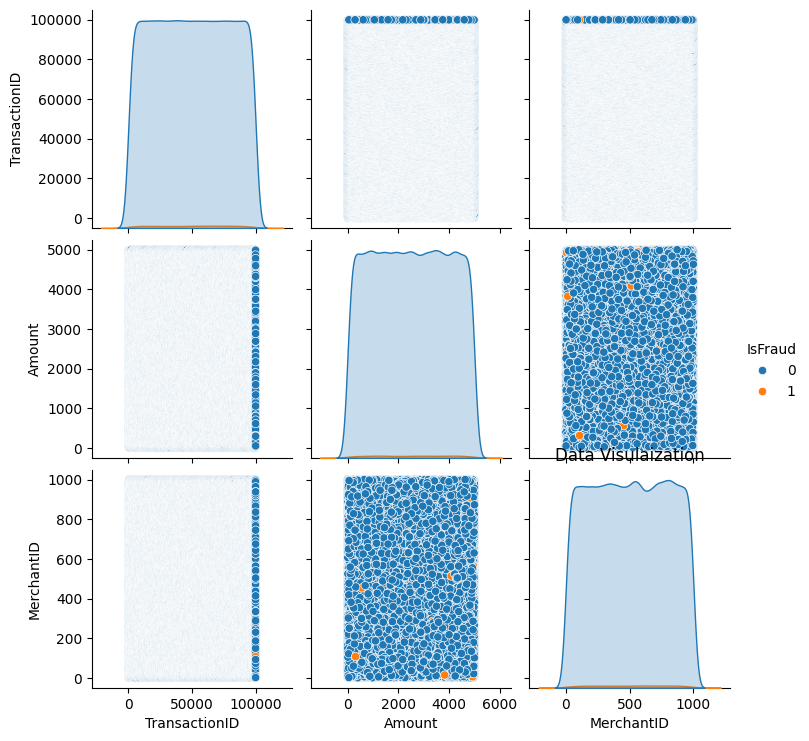

In [ ]:
##Visualizing the Data
sns.pairplot(df,hue='IsFraud')
plt.title('Data Visulaization')
plt.show()

In the next section we will perform PreProcessing of the Data, the following will be checked :


*   Missing Values
*   Outliers
*   Imbalance in DataSet
*   Feature Scaling
*   Encoding Catagorical Variables
*   Model Training
*   Model Evaluation



In [ ]:
##Checking for Missing Values
df.isnull().sum()

,0
TransactionID,0
TransactionDate,0
Amount,0
MerchantID,0
TransactionType,0
Location,0
IsFraud,0


Text(0.5, 1.0, 'Boxplot for Checking for outliers')

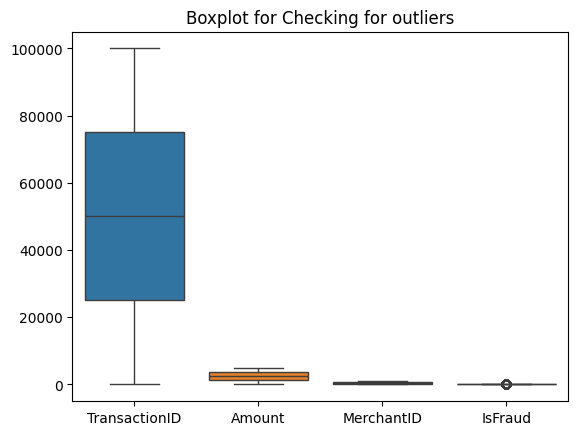

In [ ]:
##Checking for Outliers
sns.boxplot(df)
plt.title('Boxplot for Checking for outliers')

Till now we have checked for two things : Outliers and Missing Values, Since we do not have any of the either, we will proceed to check for Imbalance in the Dataset

In [ ]:
df['IsFraud'].value_counts()

,count
IsFraud,
0,99000
1,1000


The Dataset is Imbalanced, this will reduce the effeciency of out model hence we will now Resample the Dataset

In [ ]:
df_min=df[df['IsFraud']==0]
df_max=df[df['IsFraud']==1]

In [ ]:
from sklearn.utils import resample
df_min_upsampled=resample(df_min,replace=True,n_samples=len(df_max),random_state=123)

In [ ]:
df_resampled=pd.concat([df_max,df_min_upsampled],axis=0)

In [ ]:
df_resampled['IsFraud'].value_counts()

,count
IsFraud,
1,1000
0,1000


Our Dataset is now Balanced, now will Drop Unnecessary columns

In [ ]:
df.drop(['TransactionID','TransactionDate'],axis=True,inplace=True)

In [ ]:
df.head()

,Amount,MerchantID,TransactionType,Location,IsFraud
0,4189.27,688,refund,San Antonio,0
1,2659.71,109,refund,Dallas,0
2,784.00,394,purchase,New York,0
3,3514.40,944,purchase,Philadelphia,0
4,369.07,475,purchase,Phoenix,0


Next step is to Seperate Target and Independent Variables

In [ ]:
Y=df['IsFraud']
X=df.drop('IsFraud',axis=1)

Now we will:


*   Scale the amount
*   Vectorise the MerchandID
*   One Hot Encode the Transaction Type and Location




In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
scaler=StandardScaler()

In [ ]:
scaler.fit(df[['Amount']])

StandardScaler()

In [ ]:
amount_scaled=scaler.transform(df[['Amount']])

In [ ]:
amount_df=pd.DataFrame(amount_scaled,columns=['Amount'])

In [ ]:
encoder=OneHotEncoder()

In [ ]:
encoder.fit(df[['TransactionType','Location']])

OneHotEncoder()

In [ ]:
encoder_df=pd.DataFrame(encoder.transform(df[['TransactionType','Location']]).toarray(),columns=encoder.get_feature_names_out())

In [ ]:
vectoriser=TfidfVectorizer(analyzer='char')

In [ ]:
vectoriser.fit(df['MerchantID'].astype(str))

TfidfVectorizer(analyzer='char')

In [ ]:
vectoriser_df=pd.DataFrame(vectoriser.transform(df['MerchantID'].astype(str)).toarray(),columns=vectoriser.get_feature_names_out())

In [ ]:
df_main=pd.concat([amount_df,encoder_df,vectoriser_df],axis=1)

In [ ]:
df_main.isnull().sum()

,0
Amount,0
TransactionType_purchase,0
TransactionType_refund,0
Location_Chicago,0
Location_Dallas,0
Location_Houston,0
Location_Los Angeles,0
Location_New York,0
Location_Philadelphia,0
Location_Phoenix,0


Now Our DataFrame Is fully Preprocessed, Now we will:

*   Train, test and evaluate Performance



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifier=RandomForestClassifier()

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df_main,Y,test_size=0.2,random_state=42)

In [ ]:
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=classifier.predict(x_test)

Now we will Check the Metrics for the Classifer

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
accuracy_score(y_test,y_pred)
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19787
           1       0.02      0.00      0.01       213

    accuracy                           0.99     20000
   macro avg       0.51      0.50      0.50     20000
weighted avg       0.98      0.99      0.98     20000

[[19744    43]
 [  212     1]]


Now we will Save the :


*   Scaler
*   TfIdf Vectorizer
*   Classifer
*   OneHotEncoder

Into pickle files to be deployed later



In [ ]:
import pickle as pkl


In [ ]:
pkl.dump(scaler,open('scaler.pkl','wb'))
pkl.dump(vectoriser,open('vectoriser.pkl','wb'))
pkl.dump(classifier,open('classifier.pkl','wb'))
pkl.dump(encoder,open('encoder.pkl','wb'))


In [ ]:
def predict(amt,type,loc,mer_id):
  amt=scaler.transform(np.array(amt).reshape(1,1))
  ohe=np.concatenate(np.array(type).reshape(1,1),
  type=encoder.transform(np.array(type).reshape(1,1))
  loc=encoder.transform(np.array(loc).reshape(1,1))
  mer_id=vectoriser.transform(np.array(mer_id).reshape(1,1))
  return classifier.predict(np.concatenate([amt,type,loc,mer_id],axis=1))

In [ ]:
predict(234,'refund','San Antonio',4567)

ValueError: X has 1 features, but OneHotEncoder is expecting 2 features as input.